In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import os
import glob
from data import *

In [2]:
filepath = os.path.join("results")

# Find files sorted by time
files = sorted(glob.glob(os.path.join(filepath, "*.hdf5")), key=lambda f: os.stat(f).st_mtime)
print(files)

# Choose and open one file
filename = files[0]
try:
    f.close()
except:
    pass
f = h5py.File(filename, "r")

print(len(files))

['results/data-03-19_13-30-47.hdf5', 'results/data-03-19_13-31-25.hdf5', 'results/data-03-19_13-32-02.hdf5', 'results/data-03-19_13-32-44.hdf5', 'results/data-03-19_13-33-22.hdf5', 'results/data-03-19_13-34-10.hdf5', 'results/data-03-19_13-34-46.hdf5', 'results/data-03-19_13-35-27.hdf5', 'results/data-03-19_13-36-03.hdf5', 'results/data-03-19_13-36-42.hdf5', 'results/data-03-19_13-37-17.hdf5', 'results/data-03-19_13-37-56.hdf5', 'results/data-03-19_13-38-32.hdf5', 'results/data-03-19_13-39-11.hdf5', 'results/data-03-19_13-39-49.hdf5', 'results/data-03-19_13-40-37.hdf5', 'results/data-03-19_13-41-22.hdf5', 'results/data-03-19_13-42-08.hdf5', 'results/data-03-19_13-42-52.hdf5', 'results/data-03-19_13-43-37.hdf5', 'results/data-03-19_13-44-17.hdf5']
21


In [3]:
# # Plot mean observation
# mean_observation = f["mean_observation"][()]
# plt.imshow(mean_observation[::-1,:])
# plt.show()

In [4]:
#files=files[14:-1]
want=[0,5,12,19,len(files)-1]

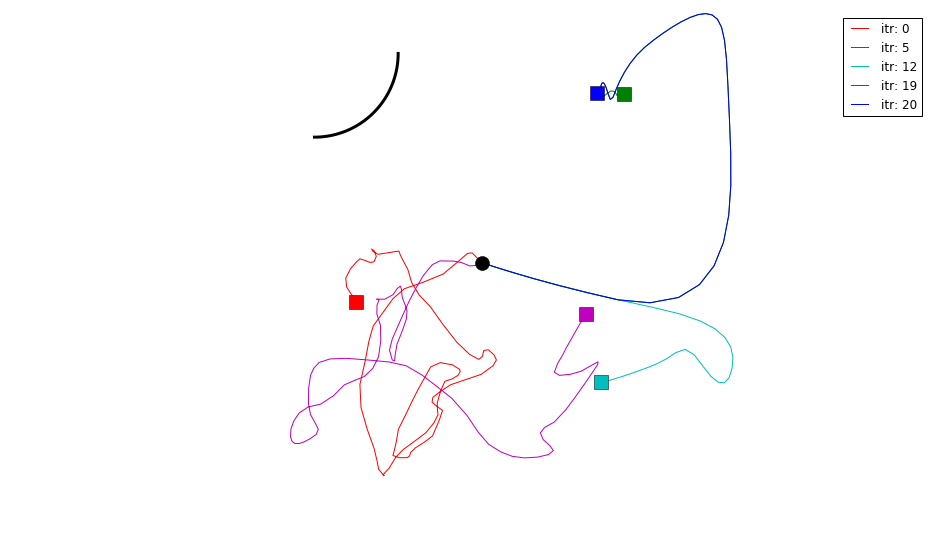

In [6]:
# Iterate through data file
# Choose and open one file
col=['r','m','c', 'g','b']
k=0
endpts=[]
fig, ax = plt.subplots(figsize=(16, 9))
for i,filename in enumerate(files):
    #filename = files[0]
    if i not in want:
        continue
    try:
        f.close()
    except:
        pass
    f = h5py.File(filename, "r")


    o  = []
    a  = []
    r  = []
    x  = []
    dx = []
    T  = 0
    size_batch = 10

    episodes = f["episodes"]
    for i in episodes:
        if T >= size_batch:
            break
        try:
            grp = episodes[i]
            actions      = grp["actions"][()]
            observations = grp["observations"][()]
            rewards      = grp["rewards"][()]
            xs  = grp["xs"][()]
            dxs = grp["dxs"][()]
        except:
            continue

        # Append data to lists
        o.append(observations)
        a.append(actions)
        r.append(rewards)
        x.append(xs[...,:2] - np.array([0, -0.45])[np.newaxis,:])
        dx.append(dxs[...,:2])
        T += rewards.shape[0]

        #print("Episode {}: {}".format(i, T))

    # Gather batch
    o  = np.concatenate(o, axis=0) # [T x 150 x 200 x 3]
    a  = np.concatenate(a, axis=0) # [T x 2]
    r  = np.concatenate(r, axis=0) # [T]
    x  = np.concatenate(x, axis=0) # [T x 2]
    dx = np.concatenate(dx, axis=0) # [T x 2]
    ax.plot(x[:,0], x[:,1], color=col[k])
    
    #append endpts for seixer plots
    endpts.append(x[-1,:])
    #plt.plot([x[0,0]], [x[0,1]], color=col[k], marker='o')
    #plt.plot([x[-1,0]], [x[-1,1]], color=col[k], marker='s')
    
    k+=1

labels=["itr: "+str(itr)   for itr in want ]

for i, c in enumerate(col):
    x=endpts[i]
    ax.plot([x[0]], [x[1]], color=col[i], marker='s', markersize=14)
ax.plot([0.], [0.], color='k', marker='o', markersize=14)

#goal region
ang=np.linspace(0.0, -np.pi/2, 100)
arcx=[-.2+np.cos(a)*.1 for a in ang]
arcy=[.25+np.sin(a)*.1 for a in ang]
ax.plot(arcx, arcy, color='k', linewidth=3)

#boundary
bound=np.array([[-.2, .25,],[.2, .25,],[.2, -.25,],[-.2, -.25,], [-.2, .25,]])
#ax.plot(bound[:, 0], bound[:,1], color='r', linewidth=3)

ax.legend(labels, loc='best')
ax.axis('equal')
ax.axis('off')
plt.savefig('dqn_raw_fine.png')
plt.show()



